# Interlab Study

This is our [Interlab study](http://2015.igem.org/Tracks/Measurement/Interlab_study). We studied three devices:

* Device 1 - J23101

* Device 2 - J23106

* Device 3 -  J23117


In [2]:
%matplotlib inline

import sys
sys.path.insert(0, '../')
import BrasilUSP_iGEM_LabLib as LabLib

import scipy.stats
import pylab as pl
import numpy as np
from math import sqrt

def biolrepl(wells):
    return np.array( [ wells[0:3].mean(), wells[3:6].mean(), wells[6:9].mean() ] ), \
        np.array( [ np.std(wells[0:3]), np.std(wells[3:6]), np.std(wells[6:9]) ] )

### Reading measurements

Reading the file with the measurements.

In [3]:
filename = 'interlab sem assign.txt'
Times, fl = LabLib.ReadFluor_nanomed(filename)
mfl = fl[0]

Name for each row.

In [4]:
RowNames = {
    0 : "LB",
    1 : "LB + Cam",
    2 : "Device 1",
    3 : "Device 2",
    4 : "Device 3",
    5 : "+ control",
    6 : "- control 1",
    7 : "- control 2",
}

### Control

Part of the control was contamined. To compute the average we have simply removed those points (all colony 3 and last column of colony 2).

In [5]:
LB_mean = np.mean( mfl[0][1:5] )
LBCam_mean = np.mean( mfl[1][:4] ) 

print 'Mean with LB: \t\t', LB_mean
print 'Mean with LB+Cam: \t', LBCam_mean

Mean with LB: 		26.795
Mean with LB+Cam: 	26.6385


Let's test if there are statistically significant differences between colonies with and without antibiotics. The two-sample [Mann-Whitney U test](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test) checks two samples whether one of them is consistently smaller than the other.

In [6]:
scipy.stats.mannwhitneyu(mfl[0][1:5], mfl[1][:4])

(6.0, 0.33250277105101456)

According to the above p-value (~$24$%), we have no reason whatsoever to distinguish both.

### Normalizing the fluorescence measurements

Since LB and LB+Cam are pretty much the same, we will use them to normalize our measurements.

In [8]:
Devs = np.zeros( (3,9) )

for j in [0,1,2]:
    Devs[j,:] = np.array( mfl[j+2] ) / LBCam_mean

In Devs we have the now normalized measurements for all three devices. Let's start by checking if the differences are statistically significant

In [12]:
U, p01 = scipy.stats.mannwhitneyu(Devs[0,:], Devs[1,:])
U, p12 = scipy.stats.mannwhitneyu(Devs[1,:], Devs[2,:])
U, p02 = scipy.stats.mannwhitneyu(Devs[0,:], Devs[2,:])

print '1 vs 2: ', p01
print '2 vs 3: ', p12
print '1 vs 3: ', p02

1 vs 2:  0.000206147401031
2 vs 3:  0.000206147401031
1 vs 3:  0.000206147401031


All p-values are around $0.02$%. Since they are all below $2.5$%, their differences are statistically significant.

### Plotting normalized results

Let's visualize now the data.

In [13]:
colors = [(0.2, 0.2, 1.0), (0.2, 1.0, 0.2), (1.0,0.2,0.2)]
x = [0.8, 1.0, 1.2, 1.8, 2.0, 2.2, 2.8, 3.0, 3.2]
colonies = np.array( [1.0, 2.0, 3.0] )

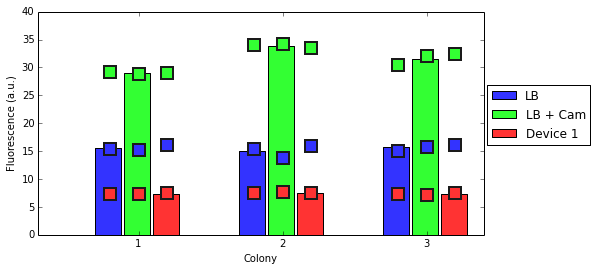

In [20]:
pl.figure( figsize=(8,4) )

for linen in [0,1,2]:
    pl.plot( x, Devs[linen] , 's', markersize=12., markeredgewidth=2.,
            markerfacecolor=colors[linen], markeredgecolor=(0.1,0.1,0.1))
    
    vals, stds = biolrepl( Devs[linen] )
    pl.bar(colonies + linen*0.2 - 0.3, vals, 0.18, color=colors[linen], label = RowNames[linen])
    
pl.xlabel('Colony')
pl.ylabel('Fluorescence (a.u.)')
pl.xlim(0.3,3.4)
pl.xticks([1.0, 2.0, 3.0])
pl.ylim(0,40)
pl.legend(bbox_to_anchor=(1.25, 0.7))
pl.show()

In the graph above, we have two different measurements: Square points are each value of each technical replicates, and bars represent average within the same colony. This is not the **best** visualization in fact, see below for a better graph.

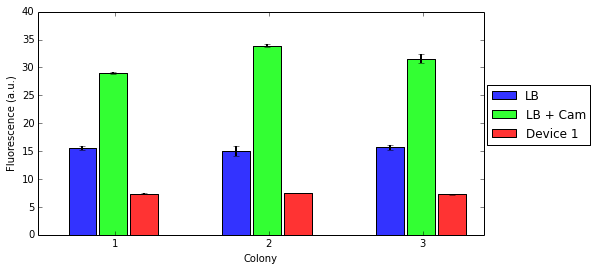

In [18]:
pl.figure( figsize=(8,4) )

error_config = {'ecolor': '0.', 'width': 10.0, 'linewidth' : 2.}

for linen in [0,1,2]:
    vals, stds = biolrepl( Devs[linen] )
    pl.bar(colonies + linen*0.2 - 0.3, vals, 0.18, yerr=stds, 
           error_kw=error_config, color=colors[linen], label = RowNames[linen])

pl.xlabel('Colony')
pl.ylabel('Fluorescence (a.u.)')
pl.xlim(0.5,3.4)
pl.xticks([1.0, 2.0, 3.0])
pl.ylim(0,40)
pl.legend(bbox_to_anchor=(1.25, 0.7))
pl.show()

Notice that the error bars are rather small, almost not visible in most cases.

Each average fluorescence for each device:

In [37]:
for j in [0,1,2]:
    print "Device %1d: %4.2f" % (j+1, Devs[j].mean())

Device 1: 15.39
Device 2: 31.48
Device 3: 7.38


### Relative fluorescence

All promoters are part of the known [Anderson's collection](http://parts.igem.org/Promoters/Catalog/Anderson), and all promoters have their *relative promoter strenghts* measured. A simple measure to have an initial insight on how each device operate relative to the others is to calculate the ratio between each average fluorescence measure.

In [11]:
print Devs[0].mean() / Devs[1].mean()
print Devs[1].mean() / Devs[2].mean()

0.48900991159
4.26734182483


We can also use the original definition of the relative promoter strength to make a more appropriate comparison [cite here the paper].